In [2]:
import numpy as np
from sklearn import linear_model 
from sklearn.datasets import make_regression 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation

In [271]:
# generate some synthetic dataset
np.random.seed(30)
x =  np.random.randint(0,100,(100,1))
y =  (3*X[:,0]+np.random.randint(50,300,100)).reshape(-1,1)

m = x.shape[0]
n = x.shape[1]

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=True) 
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(x, y)

idealw = reg_intercept.coef_
idealb = reg_intercept.intercept_
idealMSE = np.mean((y - (idealw*x+idealb))**2)

In [17]:
def batch(X,y,batchSize):
    for i in range(0,X.shape[0],batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [110]:
def grad_descent(X,y,weights,bias,lrate):
    
    n = X.shape[1]
    m = X.shape[0]

    # Performing Gradient Descent  

    y_hat     = np.dot(X, weights)+bias  # The current predicted value of y  
    der_w     = (-2/m)*np.dot(X.T,(y - y_hat))  # Derivative of MSE Loss function wrt w

    der_bias  = (-2/m)*sum(y - y_hat)            # Derivative of MSE Loss function wrt bias
    weights   = weights - lrate* der_w           # Update weight
    bias      = bias - lrate* der_bias           # Update intercept

    return weights, bias

In [203]:
def minibatchGD(X,y,batchSize,epoches, lrate):    
    #weights    = np.zeros((X.shape[1],1))
    weights    = np.array([[-300]])
    #bias       = np.zeros((1,1))
    bias        = np.array([[-100]])
    
    Ws = [weights]
    Bs = [bias]

    for i in range(epoches):
        for X_batch,y_batch in batch(X,y,batchSize):
            weights, bias  = grad_descent(X_batch,y_batch,weights,bias,lrate)
            
            Ws.append(weights)
            Bs.append(bias)

    return weights, bias, Ws, Bs

In [204]:
weights, bias, Ws, Bs = minibatchGD(x,y,5,2000,0.0001)
weights, bias

(array([[3.82070602]]), array([[124.88187999]]))

MSE    = 4525      MSE minibatchGD =  4960
weight = 3      weight minibatchGD =  4
bias   = 164      bias minibatchGD =  125


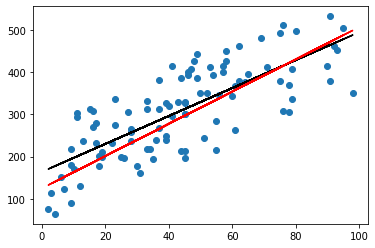

In [282]:
MSE = np.mean((y-(x*weights+bias))**2)
space = '    '

print("MSE    =", '{:.0f}'.format(idealMSE),space,        "MSE minibatchGD = ", '{:.0f}'.format(MSE))
print("weight =", '{:.0f}'.format(idealw[0][0]),space, "weight minibatchGD = ", '{:.0f}'.format(weights[0][0]))
print("bias   =", '{:.0f}'.format(idealb[0]),space,      "bias minibatchGD = ", '{:.0f}'.format(bias[0][0]))

fig, axes = plt.subplots(1,1)

axes.scatter(x,y)
axes.plot(x,(x*idealw)+idealb, color='black')
axes.plot(x,((x*weights)+bias), color='red')

plt.show()

In [206]:
Ws = np.array(Ws).reshape(-1,1)
Bs = np.array(Bs).reshape(-1,1)

In [299]:
# calculate MSE loss 
Y_hat = np.dot(x, Ws.T) + Bs.T
MSE = np.mean((y-Y_hat)**2, axis=0)

In [296]:
# coordinates for plotting linear predictors with different weight
x_coord = [x.min(), x.max()]
y_coord = []
for i in range(Y_hat.shape[1]):
    y_temp = Y_hat[:,i]
    y_coord.append([y_temp[np.argmin(x)], y_temp[np.argmax(x)]])  

In [209]:
w = np.linspace(-300,300,100)
b = np.linspace(-200,200,100)
mse_vals = np.zeros((len(w), len(b)))
print(mse_vals.shape)
                    
for i, value1 in enumerate(w):
    for j, value2 in enumerate(b):
        y_hat = value1*x + value2        
        mse_vals[i, j] = np.mean((y - y_hat)**2)
        
B, W = np.meshgrid(b, w)

(100, 100)


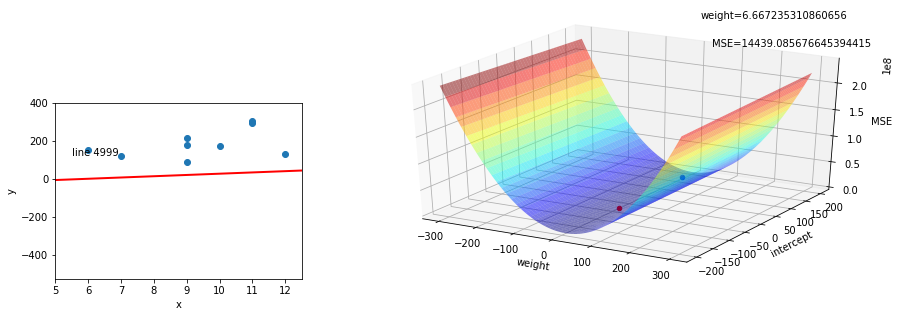

In [249]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[1:, 0])
ax1.scatter(x, y) # plot data points
ax1.set_xlim(5, 12.5)
ax1.set_ylim(-4000, 400)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
text   = ax1.text(5.5, 120, 'line 0')
line1, = ax1.plot(x_coord, y_coord[0], 'r-', linewidth=2) # plot linear predictor function

ax2 = fig.add_subplot(gs[:,1:], projection='3d')
ax2.scatter(idealw, idealb, idealMSE, color='b')
sc = ax2.scatter(Ws[0], Bs[0], MSE[0], color='r')
ax2.plot_surface(W,B,mse_vals, alpha=0.5,cmap=cm.jet)
ax2.set_zlim3d(0, mse_vals.max())
ax2.set_xlabel('weight')
ax2.set_ylabel('intercept')
ax2.set_zlabel('MSE')
text1  = ax2.text(-800, 1200,0.4,  'weight={:.15f}'.format(Ws[0][0]))
text2  = ax2.text(-600, 1000,0.4, 'MSE={:.15f}'.format(Bs[0][0]))


# animation function.  This is called sequentially
def animate(i): 
    ax1.set_ylim(y_coord[i][0]-500, 400)
    text.set_text('line '+str(i))
    line1.set_data(x_coord, y_coord[i])

    sc._offsets3d = (Ws[i], Bs[i], MSE[i])  
    text1.set_text('weight={:.15f}'.format(Ws[i][0]))
    text2.set_text('MSE={:.15f}'.format(MSE[i]))
    return line1, sc,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=5000, interval=10, blit=True)


anim.save('minibatchGD.mp4', fps=10)
plt.show()

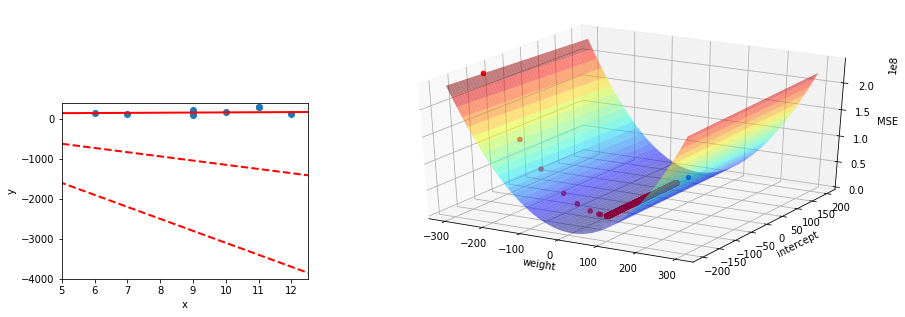

In [268]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[1:, 0])
ax1.scatter(x, y) # plot data points
ax1.set_xlim(5, 12.5)
ax1.set_ylim(-4000, 400)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

line1, = ax1.plot(x_coord, y_coord[0], 'r--', linewidth=2) # plot linear predictor function
line1, = ax1.plot(x_coord, y_coord[3], 'r--', linewidth=2)
line1, = ax1.plot(x_coord, y_coord[-1], 'r-', linewidth=2)

ax2 = fig.add_subplot(gs[:,1:], projection='3d')
ax2.scatter(idealw, idealb, idealMSE, color='b')
sc = ax2.scatter(Ws, Bs, MSE, color='r')
ax2.plot_surface(W,B,mse_vals, alpha=0.5,cmap=cm.jet)
ax2.set_zlim3d(0, mse_vals.max())
ax2.set_xlabel('weight')
ax2.set_ylabel('intercept')
ax2.set_zlabel('MSE')

plt.show()

(100, 100)


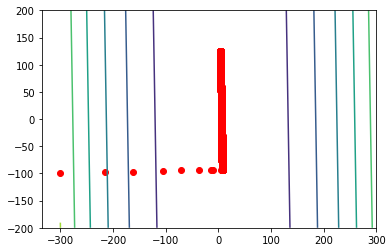

In [248]:
w = np.linspace(-300,300,100)
b = np.linspace(-200,200,100)
mse_vals = np.zeros((len(w), len(b)))
print(mse_vals.shape)
                    
for i, value1 in enumerate(w):
    for j, value2 in enumerate(b):
        y_hat = value1*x + value2        
        mse_vals[i, j] = np.mean((y - y_hat)**2)
        
B, W = np.meshgrid(b, w)

plt.contour(W,B,mse_vals)
plt.scatter(Ws, Bs, color='r')
plt.show()